In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical  # Use this instead of np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance

In [2]:
data_time = pd.read_csv("feature_time_48k_2048_load_1.csv")

In [3]:
data_time['fault'] = pd.Categorical(data_time['fault'])

In [4]:
train_data, test_data = train_test_split(data_time, test_size=750, stratify=data_time['fault'], random_state=1234)

In [5]:
# Extracting features and target
X_train = train_data.iloc[:, 0:9].values  # Selecting columns 0 to 8 (features)
y_train = train_data['fault'].values      # Selecting 'fault' column (target)

X_test = test_data.iloc[:, 0:9].values    # Selecting columns 0 to 8 (features)
y_test = test_data['fault'].values        # Selecting 'fault' column (target)

In [6]:
# Encoding categorical target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [7]:
# One-hot encoding for Keras
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [8]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Initialize ANN
classifier = Sequential()

In [10]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units=9, kernel_initializer='uniform', activation='relu', input_shape=(9,)))

# Adding the second hidden layer
classifier.add(Dense(units=9, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='softmax'))

classifier.summary()

C:\Users\TEJOMAY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 280 (1.09 KB)

 Trainable params: 280 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Fit ANN to training set
classifier.fit(X_train, y_train_one_hot, batch_size=10, epochs=100, validation_data=(X_test, y_test_one_hot))

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2200 - loss: 2.2584 - val_accuracy: 0.2013 - val_loss: 1.9023
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2382 - loss: 1.8060 - val_accuracy: 0.3360 - val_loss: 1.4979
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3649 - loss: 1.4120 - val_accuracy: 0.4573 - val_loss: 1.2531
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4747 - loss: 1.2582 - val_accuracy: 0.6280 - val_loss: 1.0848
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - loss: 1.0690 - val_accuracy: 0.7347 - val_loss: 0.9016
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7241 - loss: 0.9033 - val_accuracy: 0.7560 - val_loss: 0.7751
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7444 - loss: 0.8026 - val_accuracy: 0.7707 - val_loss: 0.6894
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7631 - loss: 0.7090 - val_accu

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9262 - loss: 0.2074 - val_accuracy: 0.9373 - val_loss: 0.2051
Epoch 52/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9239 - loss: 0.2441 - val_accuracy: 0.9427 - val_loss: 0.2042
Epoch 53/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9275 - loss: 0.2055 - val_accuracy: 0.9373 - val_loss: 0.2052
Epoch 54/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9320 - loss: 0.1900 - val_accuracy: 0.9373 - val_loss: 0.2029
Epoch 55/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9321 - loss: 0.1987 - val_accuracy: 0.9507 - val_loss: 0.1976
Epoch 56/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9422 - loss: 0.1971 - val_accuracy: 0.9387 - val_loss: 0.1936
Epoch 57/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9437 - loss: 0.1688 - val_accuracy: 0.9413 - val_loss: 0.2013
Epoch 58/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9350 - loss: 0.1994 - val_accuracy:

In [13]:
# Evaluate the model
scores = classifier.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9451 - loss: 0.1876  
Test Accuracy: 95.47%


In [14]:
# Make predictions on the test set
y_pred_one_hot = classifier.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [15]:
# Convert one-hot encoded predictions to integer labels
y_pred = np.argmax(y_pred_one_hot, axis=1)
y_test_actual = np.argmax(y_test_one_hot, axis=1)

In [16]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_actual, y_pred)

In [17]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[72  0  0  0  0  0  0  0  3  0]
 [ 1 62  3  0  0  0  2  0  6  1]
 [ 0  1 68  0  0  1  0  0  5  0]
 [ 0  0  0 75  0  0  0  0  0  0]
 [ 0  0  0  0 75  0  0  0  0  0]
 [ 0  0  0  0  0 75  0  0  0  0]
 [ 0  3  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0  0 75  0  0]
 [ 1  5  2  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0  0  0 75]]


In [18]:
print("Classification Report:")
print(classification_report(y_test_actual, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

  Ball_007_1       0.97      0.96      0.97        75
  Ball_014_1       0.87      0.83      0.85        75
  Ball_021_1       0.93      0.91      0.92        75
    IR_007_1       1.00      1.00      1.00        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.99      1.00      0.99        75
    Normal_1       0.97      0.96      0.97        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.83      0.89      0.86        75
  OR_021_6_1       0.99      1.00      0.99        75

    accuracy                           0.95       750
   macro avg       0.96      0.95      0.95       750
weighted avg       0.96      0.95      0.95       750



In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model, classes):
        self.keras_model = keras_model
        self.classes_ = classes

    def fit(self, X, y):
        return self

    def predict(self, X):
        y_pred_one_hot = self.keras_model.predict(X)
        return np.argmax(y_pred_one_hot, axis=1)

wrapped_classifier = KerasClassifierWrapper(classifier, label_encoder.classes_)

result = permutation_importance(wrapped_classifier, X_test, y_test_encoded, scoring='accuracy')

feature_names = train_data.columns[:9]  # Assuming the first 9 columns are feature names
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{feature_names[i]:<8} importance: {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

importances = result.importances_mean
indices = np.argsort(importances)[::-1]
print("\nFeature importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.3f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
24/24 ━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Feature importances for class Normal_1:
rms      importance: 0.031 +/- 0.006
sd       importance: 0.030 +/- 0.006
form 

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Feature importances for class OR_014_6_1:
rms      importance: 0.030 +/- 0.006
sd       importance: 0.030 +/- 0.006
form     importance: 0.025 +/- 0.006
min      importance: 0.020 +/- 0.005
max      importance: 0.017 +/- 0.005
mean     importance: 0.007 +/- 0.003
skewness importance: 0.001 +/- 0.003
kurtosis importance: -0.020 +/- 0.008
crest    importance: -0.025 +/- 0.002
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━

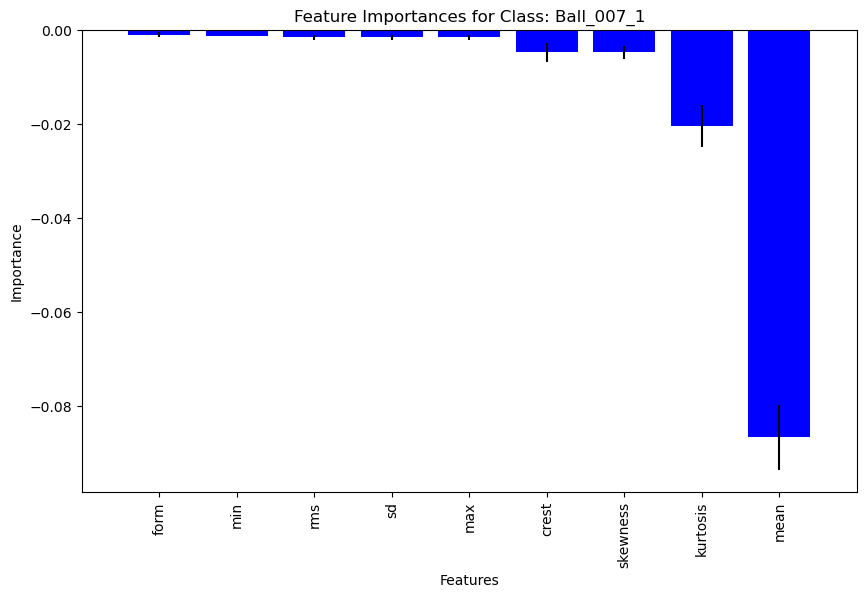

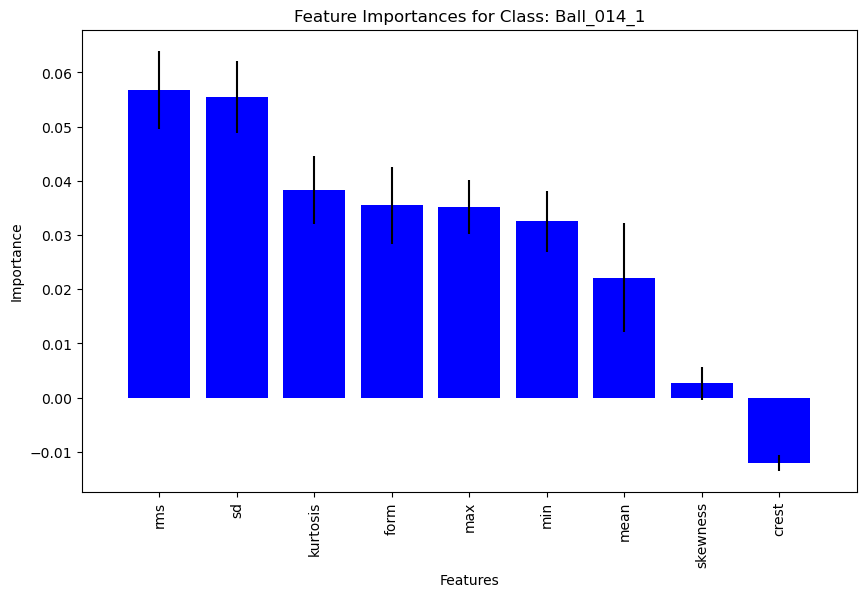

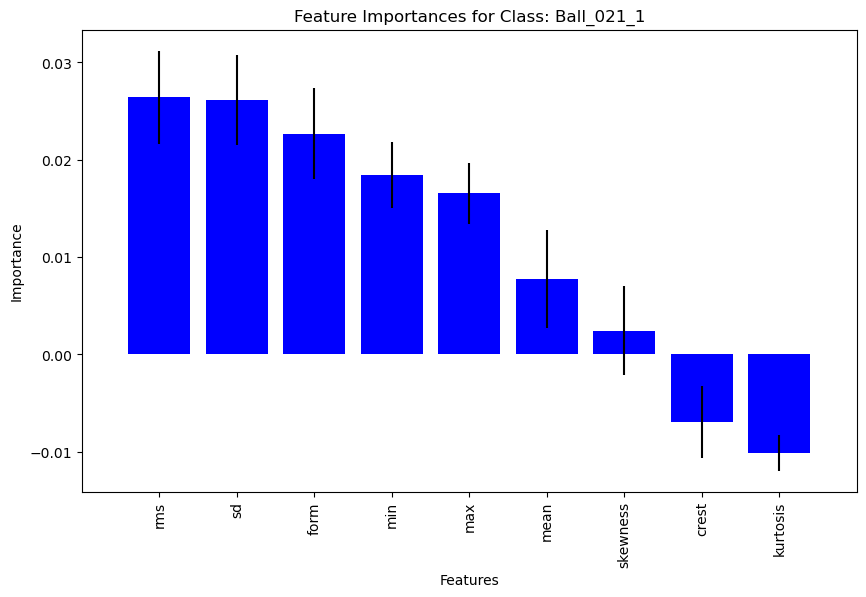

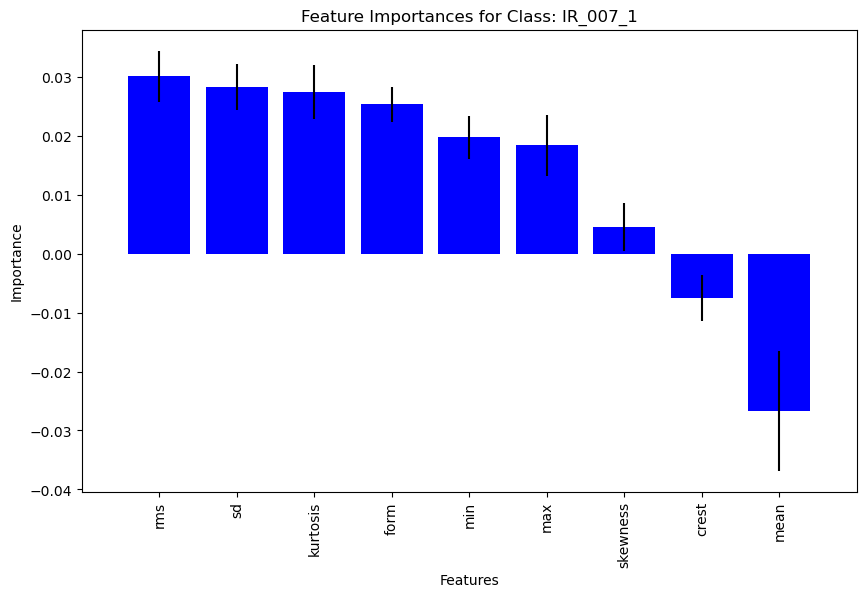

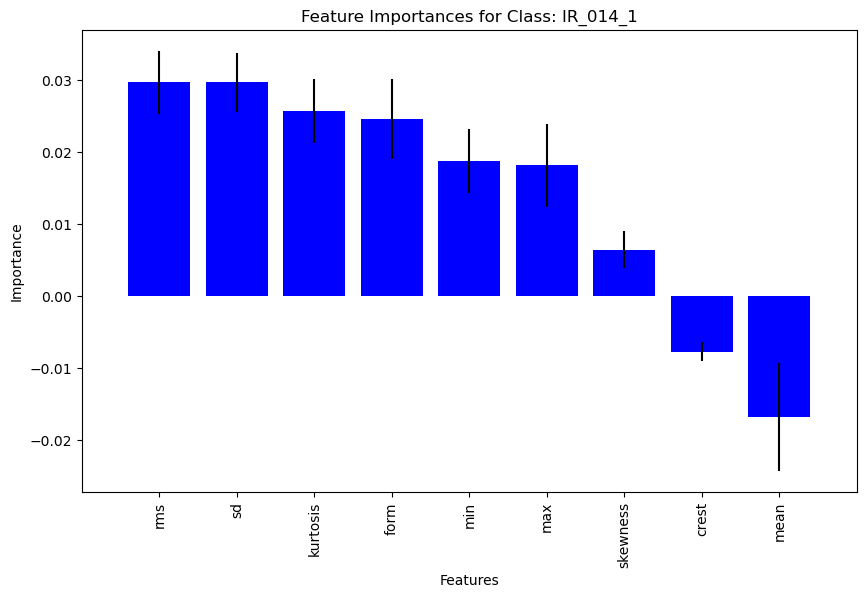

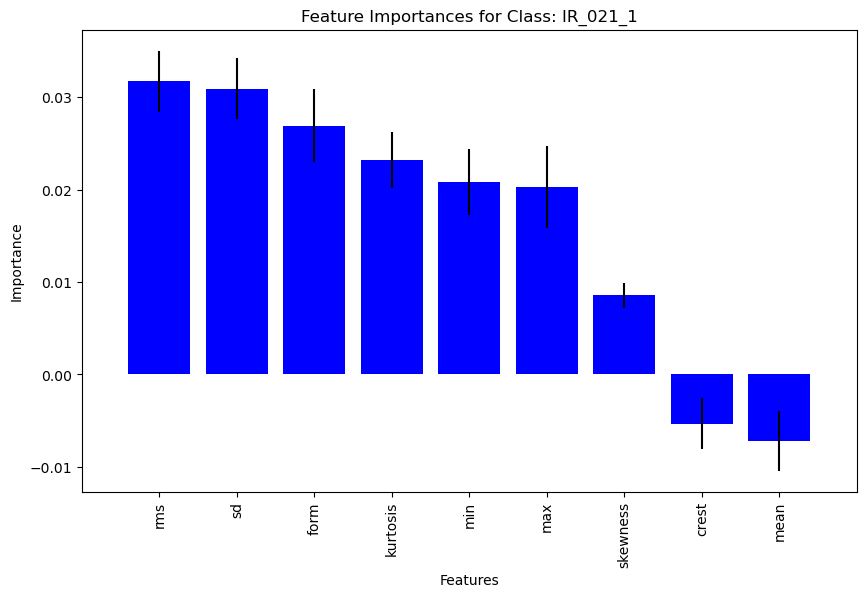

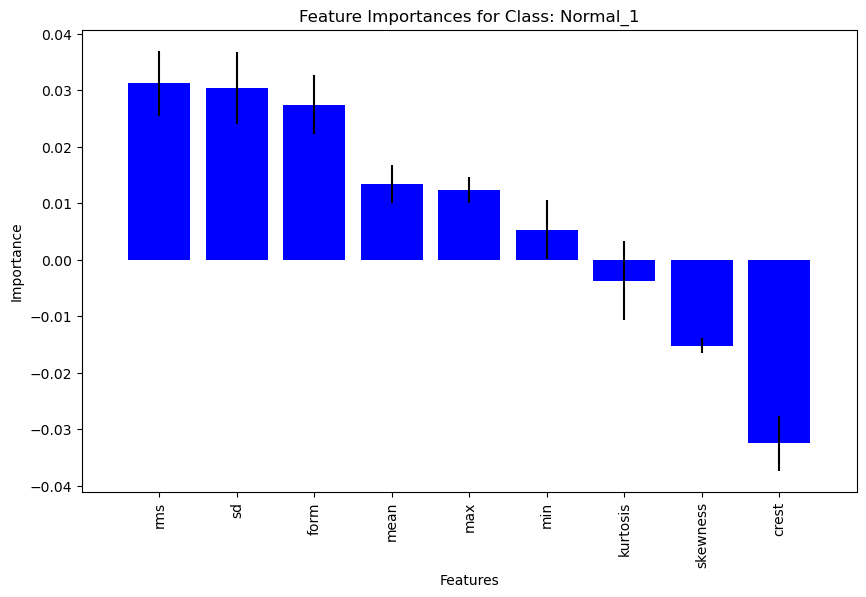

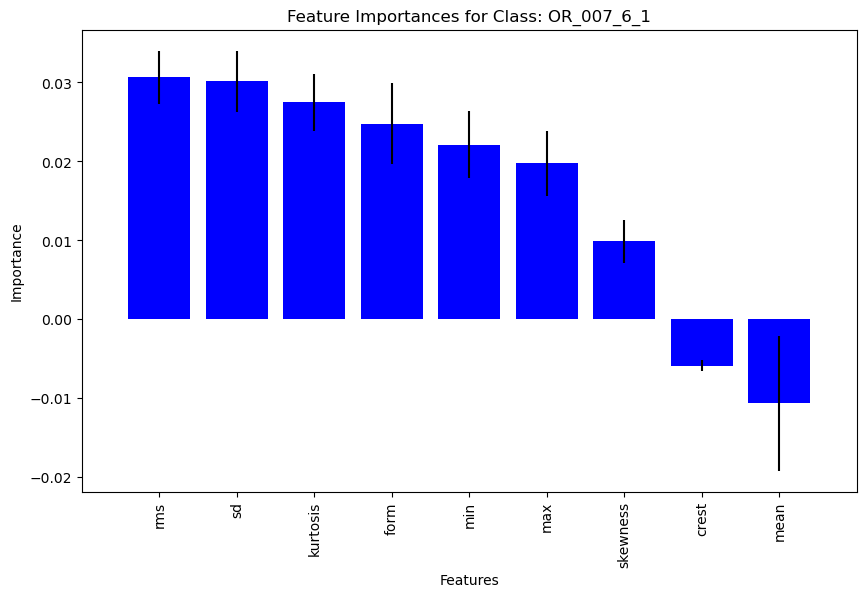

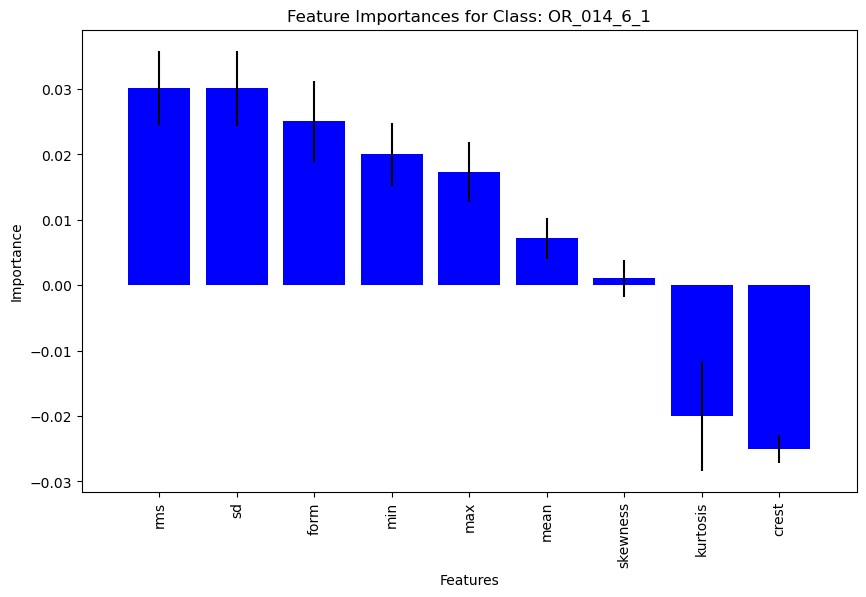

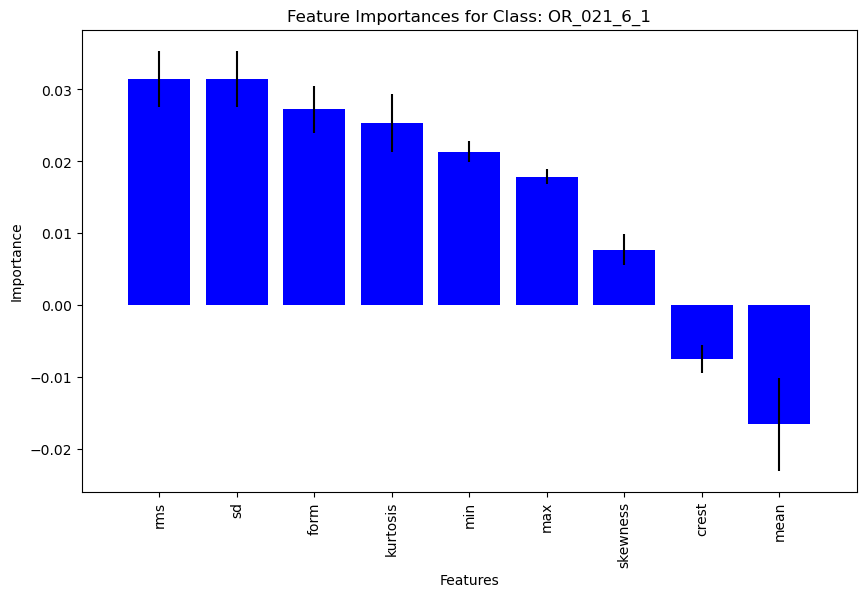

In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model, classes):
        self.keras_model = keras_model
        self.classes_ = classes

    def fit(self, X, y):
        return self

    def predict(self, X):
        y_pred_one_hot = self.keras_model.predict(X)
        return np.argmax(y_pred_one_hot, axis=1)

    def predict_proba(self, X):
        return self.keras_model.predict(X)

# Wrap the trained Keras model and pass the classes
wrapped_classifier = KerasClassifierWrapper(classifier, label_encoder.classes_)

# Function to calculate feature importance for each class
def calculate_feature_importance_per_class(wrapped_model, X_test, y_test, class_index):
    y_test_class = (y_test == class_index).astype(int)
    result = permutation_importance(wrapped_model, X_test, y_test_class, scoring='accuracy')
    return result

# Calculate feature importance for each class
feature_names = train_data.columns[:9]
class_importances = {}

for i, class_label in enumerate(label_encoder.classes_):
    result = calculate_feature_importance_per_class(wrapped_classifier, X_test, y_test_encoded, i)
    importances = result.importances_mean
    std_devs = result.importances_std
    
    class_importances[class_label] = {
        'importances': importances,
        'std_devs': std_devs
    }

    print(f"\nFeature importances for class {class_label}:")
    for idx in importances.argsort()[::-1]:
        print(f"{feature_names[idx]:<8} importance: {importances[idx]:.3f} +/- {std_devs[idx]:.3f}")

# Plotting the feature importances for each class
for class_label, importances_info in class_importances.items():
    importances = importances_info['importances']
    std_devs = importances_info['std_devs']
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances for Class: {class_label}")
    plt.bar(range(len(importances)), importances[indices], color="b", yerr=std_devs[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[idx] for idx in indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()


In [25]:
import matplotlib.pyplot as plt

# Number of classes
num_classes = len(class_importances)
# Determine the grid size for the subplots
grid_size = int(np.ceil(np.sqrt(num_classes)))

# Create a figure with a grid of subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for idx, (class_label, importances_info) in enumerate(class_importances.items()):
    importances = importances_info['importances']
    std_devs = importances_info['std_devs']
    indices = np.argsort(importances)[::-1]

    axes[idx].bar(range(len(importances)), importances[indices], color="b", yerr=std_devs[indices], align="center")
    axes[idx].set_title(f"Class: {class_label}")
    axes[idx].set_xticks(range(len(importances)))
    axes[idx].set_xticklabels([feature_names[i] for i in indices], rotation=90)
    axes[idx].set_xlim([-1, len(importances)])
    axes[idx].set_xlabel("Features")
    axes[idx].set_ylabel("Importance")

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("feature_importances_collage.png")
plt.close()
